In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Part A

In [47]:
# Prepare dataframe
df = pd.read_csv("my_basket.csv")
X = df.values

X_scaled = StandardScaler().fit_transform(X)

Rescaling is necessary because PCA is variance-based and scaling allows for a fairer distribution of ingredients with different frequencies.

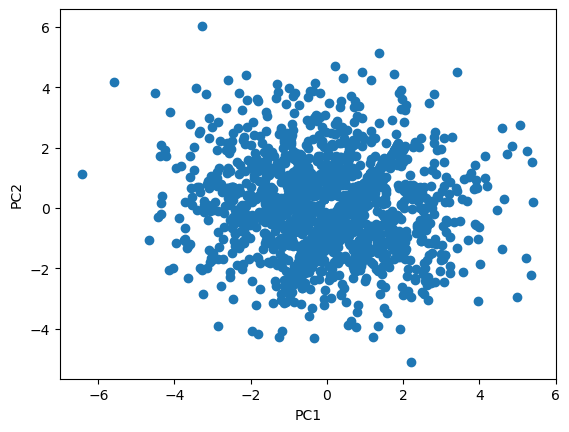

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Part B

In [ ]:
print(pca.explained_variance_ratio_)

[0.05457025 0.05171412]


The first principal component explains around 5.5% of the variance, and the second explains about 5.2%, so together they explain around 10.6% of the variance.

# Part C

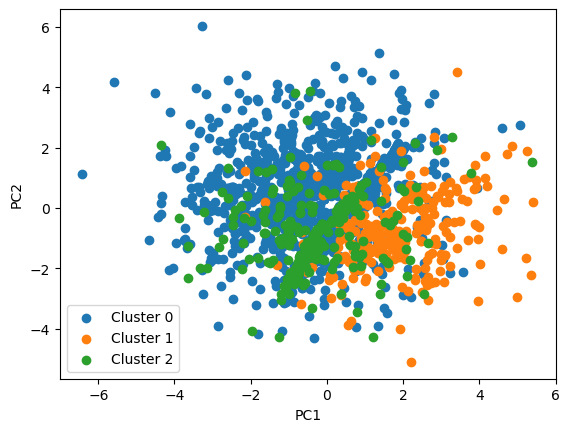

In [76]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels = clustering.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

The clustering looks somewhat reasonable in the PCA plot, but there is still a lot of overlap and ambiguity. However, we can see that the the blue cluster is generally in the left region, the orange is generally in the right, and the green is generally in the middle.

# Part D

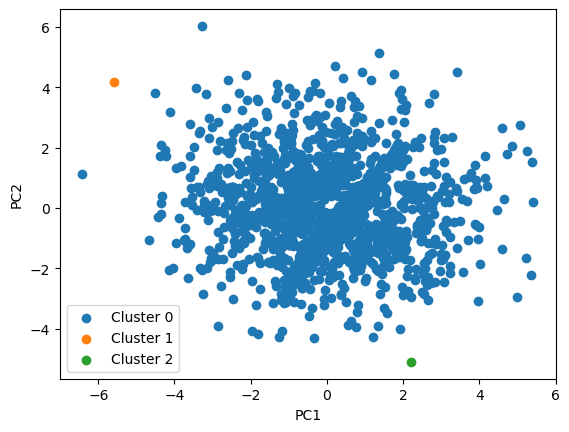

In [77]:
# First change: changing linkage to average

clustering2 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_scaled)
labels = clustering2.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

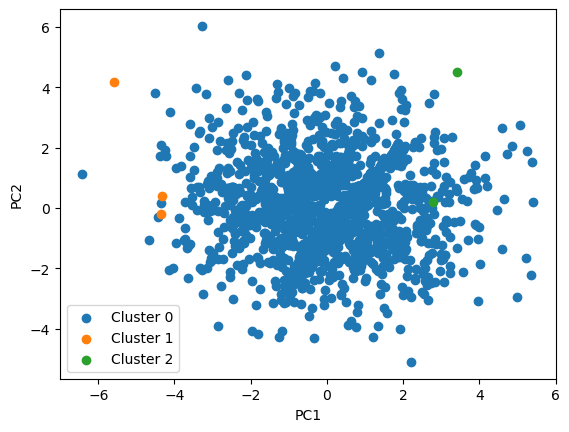

In [78]:
# Second change: changing linkage to complete

clustering3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X_scaled)
labels = clustering3.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

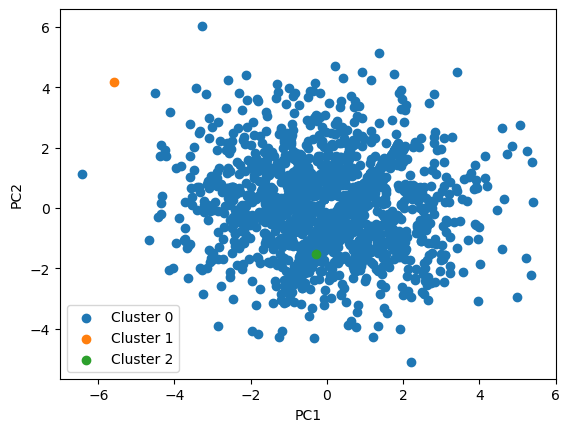

In [79]:
# Third change: changing linkage to single

clustering4 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X_scaled)
labels = clustering4.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Changing linkage from the default 'ward' to single, complete, or average changes the clusters significantly: all points except for 2-4 outliners are all part of the same cluster 0 which dominates in size. Ward linkage seems to produce the most balanced clusters.

# Part E

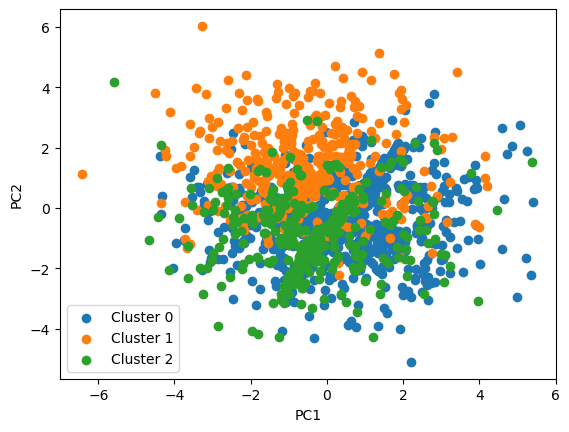

In [104]:
kmeans = KMeans(n_clusters=3).fit(X_scaled)
labels = kmeans.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

My Kmeans clustering changes randomly a lot every time I run it, so it is difficult to get a final reproducible representation. However, most iterations look very different from the agglomerative clustering method, and the clusters are not consistent.